正在生成数据集...
生成的角度序列: [148.92431531 169.09700419  74.21119441] 度
输入形状 (2D 投影): torch.Size([10, 3, 32, 32])
输出形状 (3D 模型): torch.Size([10, 32, 32, 32])

Visualizing 3D model and projections...


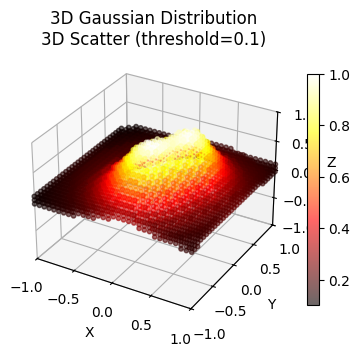

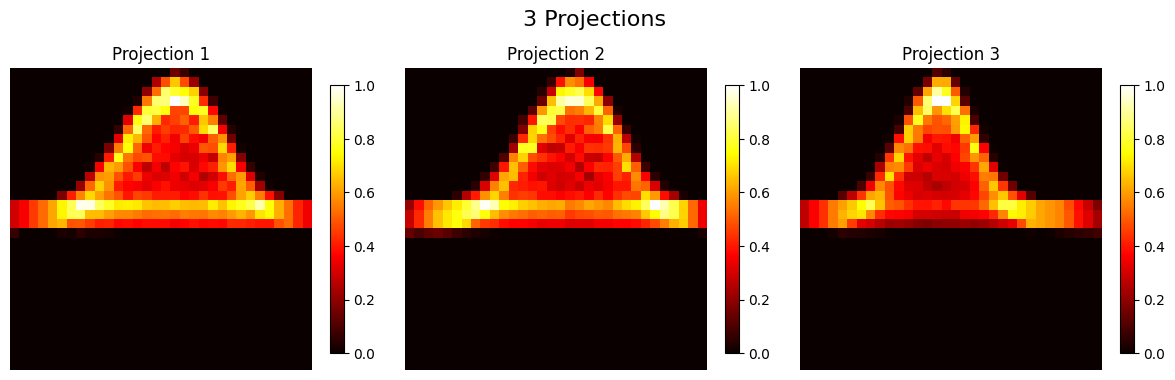

In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from dataset.gaijin_double_g import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 运行数据生成 ---
GRID_SIZE = 32
NUM_PROJECTIONS = 3 # 假设我们使用3个投影角度
NUM_SAMPLES = 10  # 训练样本数

print("正在生成数据集...")
# 
# 图示：三维体素网格中的火焰模型以及从不同角度观察到的二维投影图像。
X_train, Y_train,angles= create_dataset(NUM_SAMPLES, GRID_SIZE, NUM_PROJECTIONS,use_random_angles=True)
print(f"输入形状 (2D 投影): {X_train.shape}")
print(f"输出形状 (3D 模型): {Y_train.shape}")
    # 可视化3D模型和投影
    # 可视化3D模型和投影
print("\nVisualizing 3D model and projections...")

fig1=visualize_3d_gaussian(Y_train[5],title="3D Gaussian Distribution",threshold=0.1)
fig2 = visualize_projections(X_train[1], f"{NUM_PROJECTIONS} Projections")


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from dataset.gaijin_double_g import *
from model.c_net_1 import*
from dataset.dataload import FlameDatasetManager
from sklearn.model_selection import train_test_split

# --- 运行数据生成 ---
GRID_SIZE = 32
NUM_PROJECTIONS = 3 # 假设我们使用3个投影角度
NUM_SAMPLES = 1000  # 训练样本数



 # 初始化数据集管理器
manager = FlameDatasetManager("data/flame_dataset")
data = manager.load_dataset("GAUSS_dataset_10000")
X_all = torch.cat([data['X_train'], data['X_val']], dim=0)
Y_all = torch.cat([data['Y_train'], data['Y_val']], dim=0)
X_train, X_val, Y_train, Y_val = train_test_split(
    X_all, Y_all, 
    random_state=42,
    shuffle=True
)

# print("正在生成数据集...")
# 
# 图示：三维体素网格中的火焰模型以及从不同角度观察到的二维投影图像。
# X_train, Y_train = create_dataset(NUM_SAMPLES, GRID_SIZE, NUM_PROJECTIONS,use_random_angles=True)
print(f"输入形状 (2D 投影): {X_train.shape}")
print(f"输出形状 (3D 模型): {Y_train.shape}")

# 创建 PyTorch DataLoader
from torch.utils.data import TensorDataset, DataLoader


train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# --- 实例化模型 ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

model = Flame3DReconstructionNet(input_channels=NUM_PROJECTIONS, output_size=GRID_SIZE).to(device)


# 损失函数: 均方误差 (MSE)
criterion = nn.MSELoss()
# 优化器: Adam
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# --- 训练参数 ---
num_epochs = 50

print("开始训练模型...")

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs, targets in train_loader:
        # targets 形状: (B, D, H, W)
        # inputs 形状: (B, C, H, W)
        
        # 将数据移到 GPU/CPU
        inputs, targets = inputs.to(device), targets.to(device)
        
        # 梯度清零
        optimizer.zero_grad()
        
        # 前向传播
        outputs = model(inputs)
        
        # 计算损失
        loss = criterion(outputs, targets)
        
        # 反向传播和优化
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.6f}')

print("训练完成！")

加载数据集: GAUSS_dataset_10000
文件路径: data\flame_dataset\GAUSS_dataset_10000.pt
数据集配置:
  num_samples: 10000
  grid_size: 32
  num_projections: 3
  train_ratio: 0.8
  train_samples: 8000
  val_samples: 2000
输入形状 (2D 投影): torch.Size([7500, 3, 32, 32])
输出形状 (3D 模型): torch.Size([7500, 32, 32, 32])
使用设备: cuda
开始训练模型...
Epoch [1/50], Loss: 0.072063
Epoch [2/50], Loss: 0.010224
Epoch [3/50], Loss: 0.009748
Epoch [4/50], Loss: 0.009592
Epoch [5/50], Loss: 0.009230
Epoch [6/50], Loss: 0.008366
Epoch [7/50], Loss: 0.007657
Epoch [8/50], Loss: 0.007302
Epoch [9/50], Loss: 0.007118
Epoch [10/50], Loss: 0.007007
Epoch [11/50], Loss: 0.006904
Epoch [12/50], Loss: 0.006810
Epoch [13/50], Loss: 0.006728
Epoch [14/50], Loss: 0.006661
Epoch [15/50], Loss: 0.006613
Epoch [16/50], Loss: 0.006578
Epoch [17/50], Loss: 0.006549
Epoch [18/50], Loss: 0.006516
Epoch [19/50], Loss: 0.006485
Epoch [20/50], Loss: 0.006456
Epoch [21/50], Loss: 0.006434
Epoch [22/50], Loss: 0.006412
Epoch [23/50], Loss: 0.006395
Epoch [2


--- 可视化 Z 轴中心切片 ---


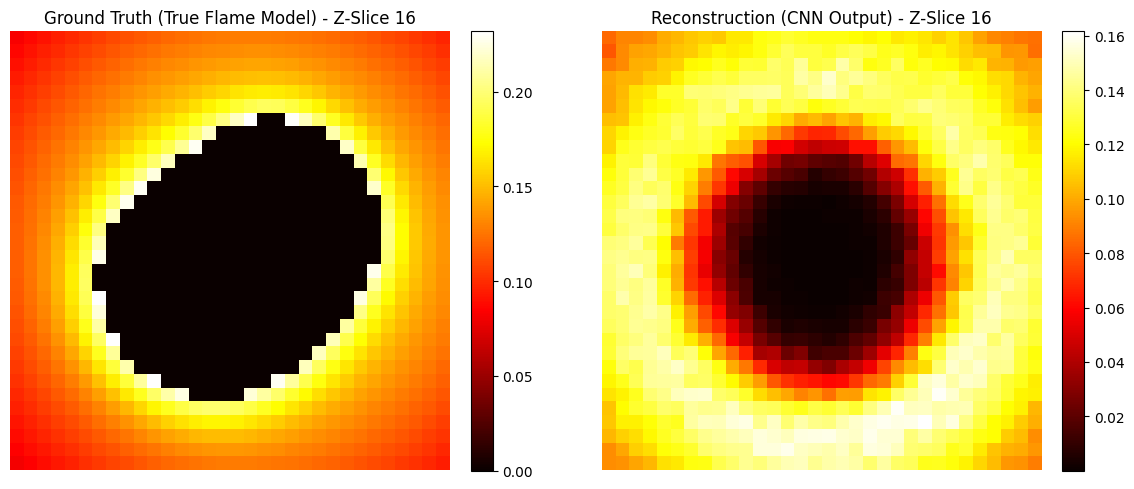


--- 可视化 X 轴中心切片 ---


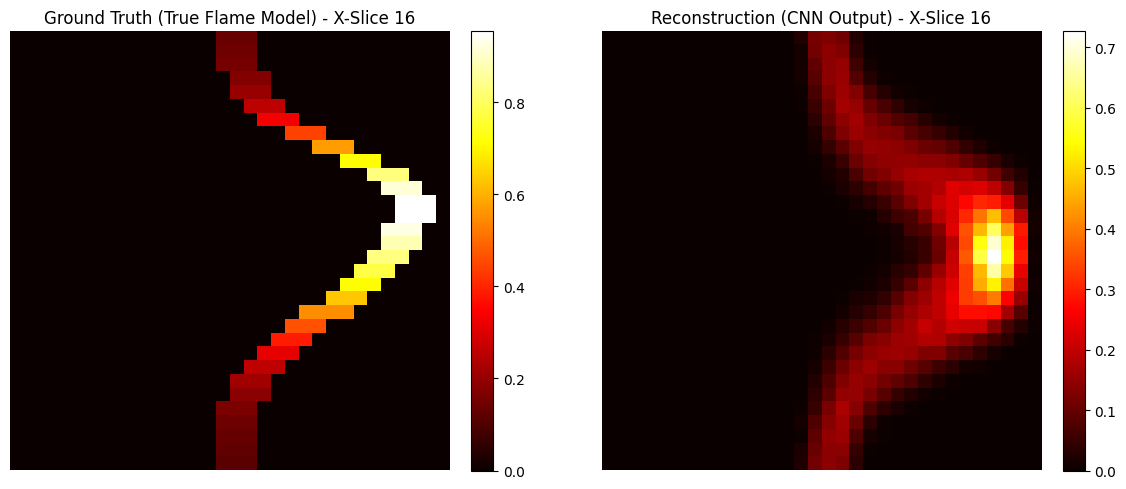

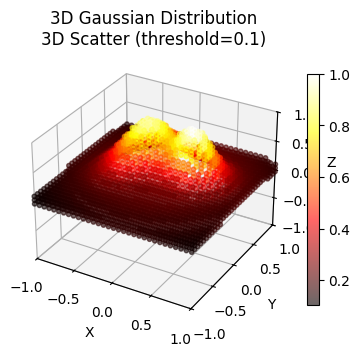

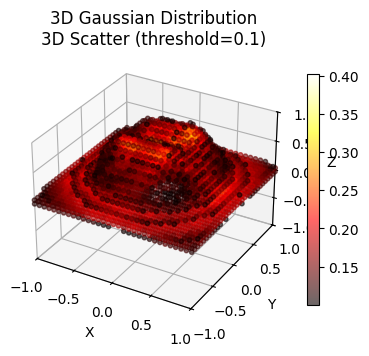

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch


# 假设模型已经训练完成，并且我们有了 X_train, Y_train, model, device 等变量

def visualize_reconstruction(model, X_data, Y_data, sample_index, slice_dim=0, slice_idx=None):
    """
    可视化真实模型和重建模型的一个切片。
    
    Args:
        model (nn.Module): 训练好的模型。
        X_data (Tensor): 输入的 2D 投影数据集。
        Y_data (Tensor): 真实的 3D 模型数据集。
        sample_index (int): 要可视化的样本索引。
        slice_dim (int): 切片维度 (0=X, 1=Y, 2=Z)。
        slice_idx (int): 切片索引 (例如，如果 size=32,取 16 为中心切片)。
    """
    
    model.eval() # 切换到评估模式
    
    # 提取输入和真实目标
    input_projections = X_data[sample_index:sample_index+1].to(device)
    true_3d = Y_data[sample_index].cpu().numpy()
    
    # 获取重建结果
    with torch.no_grad():
        reconstructed_3d = model(input_projections).squeeze(0).cpu().numpy()

    size = true_3d.shape[0]
    
    # 确定切片索引，默认取中心切片
    if slice_idx is None:
        slice_idx = size // 2
    
    # 提取切片
    if slice_dim == 0:
        true_slice = true_3d[slice_idx, :, :]
        reconstructed_slice = reconstructed_3d[slice_idx, :, :]
        dim_label = 'X'
    elif slice_dim == 1:
        true_slice = true_3d[:, slice_idx, :]
        reconstructed_slice = reconstructed_3d[:, slice_idx, :]
        dim_label = 'Y'
    else: # slice_dim == 2
        true_slice = true_3d[:, :, slice_idx]
        reconstructed_slice = reconstructed_3d[:, :, slice_idx]
        dim_label = 'Z'

    # --- 绘图 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # 1. 真实模型切片
    im1 = axes[0].imshow(true_slice, cmap='hot', origin='lower')
    axes[0].set_title(f'Ground Truth (True Flame Model) - {dim_label}-Slice {slice_idx}')
    axes[0].axis('off')
    fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

    # 2. 重建模型切片
    im2 = axes[1].imshow(reconstructed_slice, cmap='hot', origin='lower')
    axes[1].set_title(f'Reconstruction (CNN Output) - {dim_label}-Slice {slice_idx}')
    axes[1].axis('off')
    fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)
    
    plt.tight_layout()
    plt.show()

# --- 运行可视化 ---

# 假设我们在训练集中选取第一个样本进行可视化
SAMPLE_TO_VISUALIZE = 400

# 可视化 Z 轴的中心切片 (slice_dim=2)
print("\n--- 可视化 Z 轴中心切片 ---")
visualize_reconstruction(model, X_train, Y_train, 
                         sample_index=SAMPLE_TO_VISUALIZE, 
                         slice_dim=2, 
                         slice_idx=GRID_SIZE // 2)

# 可视化 X 轴的中心切片 (slice_dim=0)
print("\n--- 可视化 X 轴中心切片 ---")
visualize_reconstruction(model, X_train, Y_train, 
                         sample_index=SAMPLE_TO_VISUALIZE, 
                         slice_dim=0, 
                         slice_idx=GRID_SIZE // 2)

index=50
fig1=visualize_3d_gaussian(Y_train[index],title="3D Gaussian Distribution")
model.eval() # 切换到评估模式

# 提取输入和真实目标
input_projections = X_train[index:index+1].to(device)
true_3d = Y_train[index].cpu().numpy()

# 获取重建结果
with torch.no_grad():
    reconstructed_3d = model(input_projections).cpu().numpy()


fig2 = visualize_3d_gaussian(reconstructed_3d[0], title="3D Gaussian Distribution")


In [ ]:
torch.save(model, 'flame_model.pth')


In [ ]:
# 加载整个模型
model = torch.load('flame_model.pth', map_location=device)
model.eval()